# `GRIP @The Sparks Fundation`

## <u>Prediction Using Supervised ML<u>

### Importing the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Reading the CSV file

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
X = np.array(df['Hours']).reshape(-1,1)
y = np.array(df['Scores']).reshape(-1,1)

## Checking the ralationship between input and output variables 

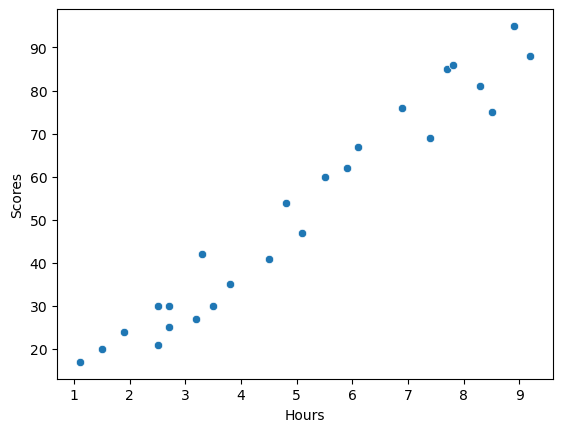

In [5]:
sns.scatterplot(data=df,x='Hours',y='Scores')
plt.show()

# Building the model

### Importing the necessary function of Scikit Learn

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

### Spliiting the dataset into training and testing data

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state= 9)

### Model

In [8]:
reg_model = LinearRegression() 

### Tuning the Hyperparameter

In [12]:
param = {'fit_intercept':[True,False]}

In [13]:
grid = GridSearchCV(reg_model,param_grid = param, cv = 5)

### Training the model

In [14]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]})

In [15]:
grid.best_score_

0.9465948365483822

In [16]:
grid.best_params_

{'fit_intercept': False}

### Testing the model

In [17]:
y_pred = grid.predict(X_test)

### Model's performance

In [18]:
print("r2_score:",r2_score(y_test,y_pred))
print("mean_squared_error:",mean_squared_error(y_test,y_pred))

r2_score: 0.9142027436899546
mean_squared_error: 37.68775805749831


### Best fit line

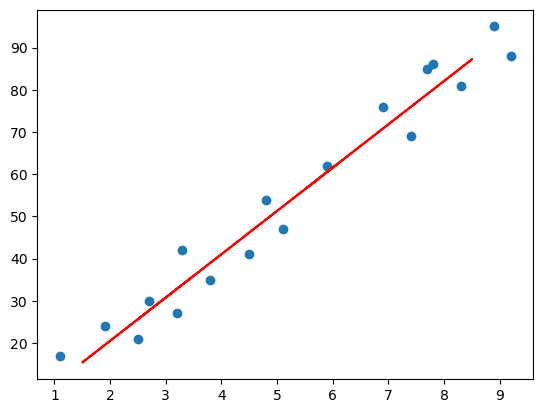

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_test,y_pred,color='red')
plt.show()

### Prediction of score for 9.5 hours

In [20]:
hours = np.array([9.5]).reshape(-1,1)

In [21]:
output = grid.predict(hours)

In [23]:
output

array([[97.47692734]])